https://www.kaggle.com/code/sujithmandala/cyberbullying-detection-nlp/input

importing libraries
loading data
data cleaning
data processing
feature engineering
data visualization
building a model
a/b testing


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import word2vec
from gensim.parsing.preprocessing import remove_stopword_tokens
import nltk
import spacy


Loading data

In [ ]:
bullydata = pd.read_csv('/content/cyberbullying_tweets.csv')

In [ ]:
bullydata.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
bullydata.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [ ]:
bullydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
bullydata.isna()

,tweet_text,cyberbullying_type
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
47687,False,False
47688,False,False
47689,False,False
47690,False,False


there is no missing data

In [ ]:
bullydata['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

deleting duplicate data if any

In [ ]:
bullydatadup = bullydata[bullydata.duplicated() ]

In [ ]:
num_bullydatadup = len(bullydatadup)
print(f"number of dup : {num_bullydatadup}")

number of dup : 36


Deleting duplicate data

In [ ]:
bullydatareal = bullydata.drop_duplicates()

In [ ]:
bullydatareal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
bullydatareal.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
uniquebully = bullydatareal['cyberbullying_type'].value_counts()

<Axes: title={'center': 'unique bully types'}, xlabel='cyberbullying_type'>

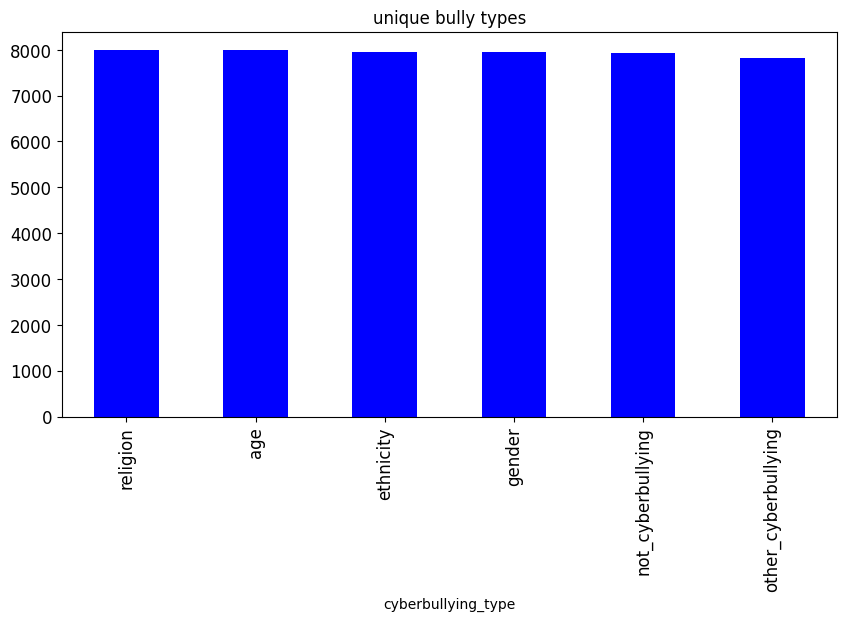

In [ ]:
uniquebully.plot(kind='bar',figsize=(10,5), title='unique bully types',color ='blue',fontsize=12)


splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ... (your existing code) ...

# Split the data
X = bullydatareal['tweet_text']  # Features (original text)
y = bullydatareal['cyberbullying_type']  # Target variable (cyberbullying type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [ ]:
X_train,X_test.info()


<class 'pandas.core.series.Series'>
Index: 9532 entries, 14204 to 21762
Series name: tweet_text
Non-Null Count  Dtype 
--------------  ----- 
9532 non-null   object
dtypes: object(1)
memory usage: 148.9+ KB


(38614    these are bullies THESE ARE HIGH SCHOOL FUCKIN...
 43928    RT @Rubbery_Ducky: fuck boosie.hes killing UR ...
 16747    It's funny actually, suppose, just suppose Chi...
 12846    @omfgmorrison BLESS. Hook's allowed to make ra...
 22994    RT @harikondabolu: In his #Ferguson testimony,...
                                ...                        
 11295    RT @uberfeminist: Yes! I tell cops that a Star...
 44766    While people love Splash mountain.... It's bas...
 38192    When I think of high school bullies I think of...
 860      RT @RavenHUWolf: University of #Texas-#Arlingt...
 15825    Stay strong Missionary Man. Don't let these fe...
 Name: tweet_text, Length: 38124, dtype: object,
 None)

Removing stop words

In [ ]:
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

bullydatareal['tweet_text_nostop'] = bullydatareal['tweet_text'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-18-48996717354d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bullydatareal['tweet_text_nostop'] = bullydatareal['tweet_text'].apply(remove_stopwords)


In [ ]:
   religion_cyberbullying = bullydatareal[bullydatareal['cyberbullying_type'] == 'religion']
   age_cyberbullying = bullydatareal[bullydatareal['cyberbullying_type'] == 'age']
   ethnicity_cyberbullying = bullydatareal[bullydatareal['cyberbullying_type'] == 'ethnicity']
   gender_cyberbullying = bullydatareal[bullydatareal['cyberbullying_type'] == 'gender']
   not1_cyberbullying = bullydatareal[bullydatareal['cyberbullying_type'] == 'not_cyberbullying']
   other1_cyberbullying = bullydatareal[bullydatareal['cyberbullying_type'] == 'other_cyberbullying']


In [ ]:
religion_cyberbullying.head()


,tweet_text,cyberbullying_type,tweet_text_nostop
15918,"Sudeep, did she invite him though? No right? W...",religion,sudeep invite though right getting worded your...
15919,@discerningmumin Islam has never been a resist...,religion,discerningmumin islam never resistance oppress...
15920,"Boy, your comment about Journalists wanting to...",religion,boy comment journalists wanting keep churches ...
15921,@ShashiTharoor @INCIndia Hindus were and are g...,religion,shashitharoor incindia hindus getting killed m...
15922,White supremicists? How many do you know? Ther...,religion,white supremicists many know idiots races anti...


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

dataframes = [religion_cyberbullying, age_cyberbullying, ethnicity_cyberbullying, gender_cyberbullying, not1_cyberbullying, other1_cyberbullying]
for df in dataframes:
    df['tweet_text_lemma'] = df['tweet_text_nostop'].apply(lemmatize_text)

<ipython-input-21-a77a334fcab1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text_lemma'] = df['tweet_text_nostop'].apply(lemmatize_text)
<ipython-input-21-a77a334fcab1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text_lemma'] = df['tweet_text_nostop'].apply(lemmatize_text)
<ipython-input-21-a77a334fcab1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

counting most number of words from each data frame

In [ ]:
#adding all
all_data = pd.concat([religion_cyberbullying, age_cyberbullying, ethnicity_cyberbullying,
                      gender_cyberbullying, not1_cyberbullying, other1_cyberbullying],
                     ignore_index=True)

In [ ]:
 all_data.head()

,tweet_text,cyberbullying_type,tweet_text_nostop,tweet_text_lemma
0,"Sudeep, did she invite him though? No right? W...",religion,sudeep invite though right getting worded your...,sudeep invite though right getting word you re...
1,@discerningmumin Islam has never been a resist...,religion,discerningmumin islam never resistance oppress...,discerningmumin islam never resistance oppress...
2,"Boy, your comment about Journalists wanting to...",religion,boy comment journalists wanting keep churches ...,boy comment journalist want keep church close ...
3,@ShashiTharoor @INCIndia Hindus were and are g...,religion,shashitharoor incindia hindus getting killed m...,shashitharoor incindia hindu getting kill musl...
4,White supremicists? How many do you know? Ther...,religion,white supremicists many know idiots races anti...,white supremicist many know idiot race antisem...


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47656 entries, 0 to 47655
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
 2   tweet_text_nostop   47656 non-null  object
 3   tweet_text_lemma    47656 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# 1. Split all_data into train and validation (if needed)
X = all_data['tweet_text_lemma']
y = all_data['cyberbullying_type']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Preprocess bullydata (test data)
bullydata['tweet_text_nostop'] = bullydata['tweet_text'].apply(remove_stopwords)
bullydata['tweet_text_lemma'] = bullydata['tweet_text_nostop'].apply(lemmatize_text)

# 3. Define X_test and y_test from bullydata
X_test = bullydata['tweet_text_lemma']
y_test = bullydata['cyberbullying_type']

# 4. Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=5000)

# 5. Fit the vectorizer to X_train and transform
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# 6. Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')  # Multinomial for multi-class classification
model.fit(X_train_tfidf, y_train)

# 7. Make predictions
y_pred = model.predict(X_test_tfidf)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.870460454583578

Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.98      0.97      7992
          ethnicity       0.98      0.98      0.98      7961
             gender       0.93      0.87      0.90      7973
  not_cyberbullying       0.71      0.65      0.68      7945
other_cyberbullying       0.69      0.78      0.73      7823
           religion       0.97      0.96      0.96      7998

           accuracy                           0.87     47692
          macro avg       0.87      0.87      0.87     47692
       weighted avg       0.87      0.87      0.87     47692


Confusion Matrix:
 [[7811    7   13   78   80    3]
 [   4 7820   11   40   76   10]
 [  19   26 6933  522  454   19]
 [ 273   58  231 5158 2030  195]
 [  50   59  249 1311 6112   42]
 [   3   12   17  207   79 7680]]
